I have been collecting data from Europe's top 5 soccer leagues, namely: Spain, England, Italy, Germany and France. I have been using the data for miscellenous dana analysis. However, I am really interested in building a model that I can use to predict how many points a team can get, and therefore which position they are likely to finish. This is the first attempt at building such a model. This is going to be an iterative process where I build the model, evaluate it, decide what to do next based on it's performance. I will continue to update and train different models, as well as adding or removing features as I work towards a set of features that gives me the best chance to predict possible points accumulated. 

Before I begin, I have to install a number of packages that I need for this. Since I am working in a virtual python environment I have to install everything, including ones such as matplotlib that come preinstalled in Jupyter notebooks. I chose this path because I work on different projects all the time and this is the best way to ensure there is no cross pollination of modules, which I have encountered.

In [1]:
pip install boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 KB 1.7 MB/s eta 0:00:00a 0:00:01
  Using cached s3transfer-0.10.3-py3-none-any.whl (82 kB)
  Using cached jmespath-1.0.1-py3-none-any.whl (20 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 10.1 MB/s eta 0:00:0000:0100:01
  Using cached urllib3-1.26.20-py2.py3-none-any.whl (144 kB)
You should consider upgrading via the '/Users/sylvestermhlanga/Documents/GitHub/ML-projects/league position predictor/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

  Using cached pandas-2.0.3-cp38-cp38-macosx_10_9_x86_64.whl (11.7 MB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
  Using cached numpy-1.24.4-cp38-cp38-macosx_10_9_x86_64.whl (19.8 MB)
  Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
You should consider upgrading via the '/Users/sylvestermhlanga/Documents/GitHub/ML-projects/league position predictor/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 9.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 KB 5.5 MB/s eta 0:00:0000:01
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 9.9 MB/s eta 0:00:00:00:010:01m
  Using cached importlib_resources-6.4.5-py3-none-any.whl (36 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 10.0 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/Users/sylvestermhlanga/Documents/GitHub/ML-projects/league position predictor/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
You should consider upgrading via the '/Users/sylvestermhlanga/Documents/GitHub/ML-projects/league position predictor/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 6.8 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 4.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 KB 4.2 MB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/Users/sylvestermhlanga/Documents/GitHub/ML-projects/league position predictor/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install python-dotenv

You should consider upgrading via the '/Users/sylvestermhlanga/Documents/GitHub/ML-projects/league position predictor/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
import boto3
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import io
import os
from dotenv import load_dotenv


bucket = os.getenv('AWS_BUCKET_NAME')
access_key_id = os.getenv('AWS_ACCESS_KEY_ID')
secret_key = os.getenv('AWS_PRIVATE_KEY')

s3_client = boto3.client(
        's3',
        aws_access_key_id=access_key_id,
        aws_secret_access_key=secret_key)

#read csv file from s3
response = s3_client.get_object(Bucket=bucket, Key='EU Top Five Leagues 2020-2024.csv')

merged_seasons = pd.read_csv(io.BytesIO(response['Body'].read()))

#ml_set = merged_seasons.drop(['league', 'season', 'team', 'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min', 'Rk', 'Playing Time_90s', 'url_', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'xG', 'Top Team Scorer', 'Attendance', 'Pts/MP', 'xGD/90', 'Last 5'], axis=1)


In [40]:
merged_seasons = merged_seasons[merged_seasons['season']!='2024-2025']
merged_seasons.head()

,league,season,team,players_used_,Age_,Poss_,Playing Time_MP,Playing Time_Starts,Playing Time_Min,Playing Time_90s,...,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer
0,ENG-Premier League,2019-2020,Arsenal,29,25.8,53.8,38,418,3420,38.0,...,8,56,1.47,47.0,55.3,-8.3,-0.22,NaN,47589.0,Pierre-Emerick Aubameyang - 22
1,ENG-Premier League,2019-2020,Arsenal,29,25.8,53.8,38,418,3420,38.0,...,8,56,1.47,47.0,55.3,-8.3,-0.22,NaN,47589.0,Pierre-Emerick Aubameyang - 22
2,ENG-Premier League,2019-2020,Aston Villa,28,25.7,44.1,38,418,3420,38.0,...,-26,35,0.92,44.3,67.8,-23.5,-0.62,NaN,28505.0,Jack Grealish - 8
3,ENG-Premier League,2019-2020,Aston Villa,28,25.7,44.1,38,418,3420,38.0,...,-26,35,0.92,44.3,67.8,-23.5,-0.62,NaN,28505.0,Jack Grealish - 8
4,ENG-Premier League,2019-2020,Bournemouth,27,25.2,44.1,38,418,3420,38.0,...,-25,34,0.89,44.8,62.3,-17.5,-0.46,NaN,7745.0,Callum Wilson - 8


In [41]:
ml_set_compr = merged_seasons.drop(['league', 'season', 'team', 'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min', 'Rk', 'Playing Time_90s', 'url_', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 
                             'Top Team Scorer',  'Attendance', 'Pts/MP', 'xGD/90', 'Last 5', 'Expected_xG', 'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A', 'Per 90 Minutes_G-PK', 
                              'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG', 'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG', 'Per 90 Minutes_npxG+xAG'], axis=1)

ml_set_compr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 976 entries, 0 to 1127
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   players_used_      976 non-null    int64  
 1   Age_               976 non-null    float64
 2   Poss_              976 non-null    float64
 3   Performance_Gls    976 non-null    int64  
 4   Performance_Ast    976 non-null    int64  
 5   Performance_G+A    976 non-null    int64  
 6   Performance_G-PK   976 non-null    int64  
 7   Performance_PK     976 non-null    int64  
 8   Performance_PKatt  976 non-null    int64  
 9   Performance_CrdY   976 non-null    int64  
 10  Performance_CrdR   976 non-null    int64  
 11  Expected_npxG      976 non-null    float64
 12  Expected_xAG       976 non-null    float64
 13  Expected_npxG+xAG  976 non-null    float64
 14  Progression_PrgC   976 non-null    int64  
 15  Progression_PrgP   976 non-null    int64  
 16  GA                 976 non-nul

Inspecting for missing values

In [42]:
missing_values = ml_set.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


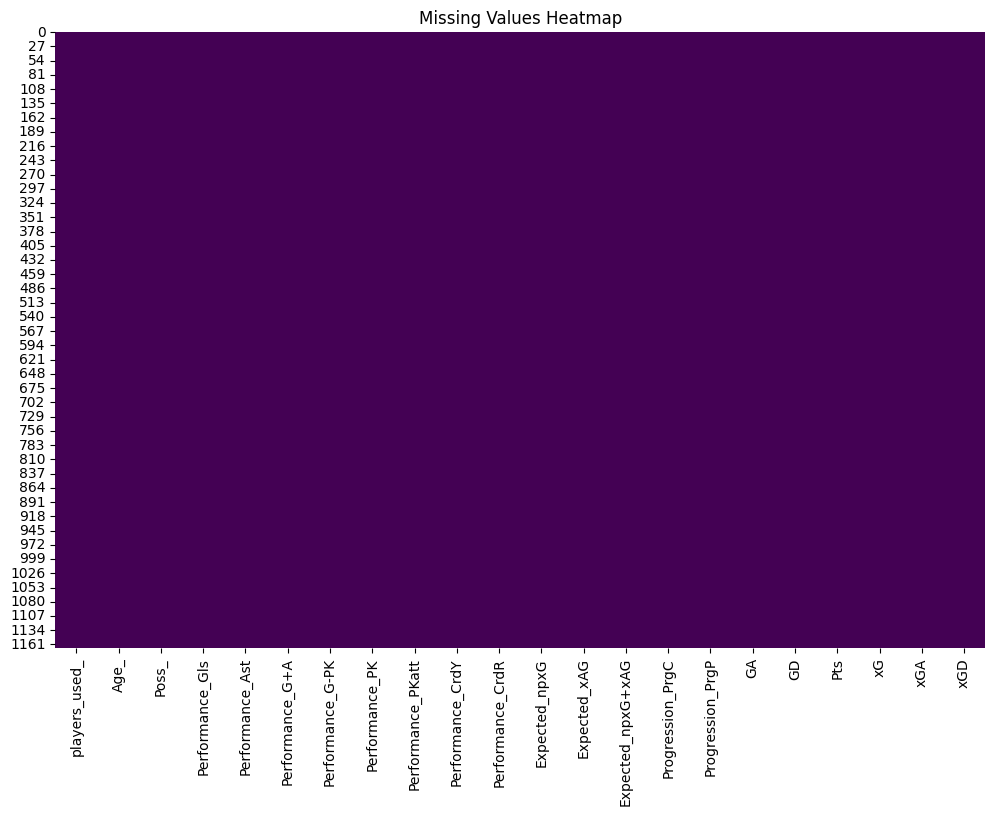

In [43]:

plt.figure(figsize=(12,8))
sns.heatmap(ml_set.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

No missing values

In [44]:
ml_set.columns

Index(['players_used_', 'Age_', 'Poss_', 'Performance_Gls', 'Performance_Ast',
       'Performance_G+A', 'Performance_G-PK', 'Performance_PK',
       'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR',
       'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG',
       'Progression_PrgC', 'Progression_PrgP', 'GA', 'GD', 'Pts', 'xG', 'xGA',
       'xGD'],
      dtype='object')

Correlation Heatmap

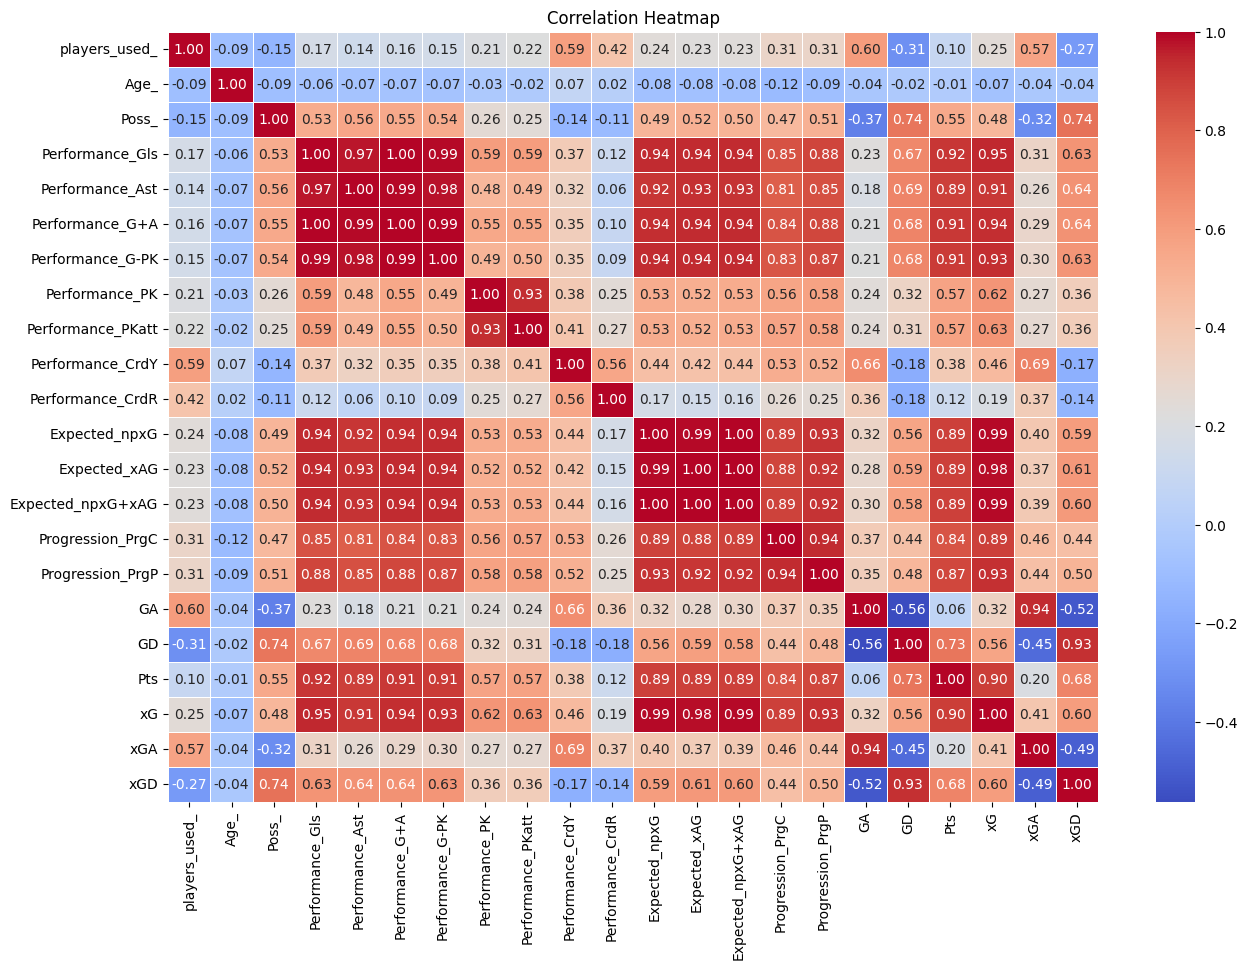

In [45]:
plt.figure(figsize=(15,10))
sns.heatmap(ml_set.corr(), annot=True, fmt='0.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Looking at the correlation heatmap, we can see that Expected_npxG, Expected_xAG and Expected_npxG+xAG have the same correlation to Pts. This will be problematic for the model as it suggests multicollinearity between the three independent variables. We can see this as well by looking at the correlation between those variables which extremely why. In order to ensure this does not affect the model, I will need to standardize the data before training. 

Now that I have made sure there are no missing values and understand the need to standardize, I will separate the data into X and y values, with X being all the independent variables and y being Pts, which is what we want to be able to predict. 

In [46]:
X = ml_set.loc[:, ml_set.columns != 'Pts']
y = ml_set['Pts']

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

standardized_x = scaler.fit_transform(X)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(standardized_x, y, test_size=0.2, random_state=42)



model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [77]:
y_pred = model.predict(X_test)

print(model.coef_)

[-5.46297105e-01  6.02736920e-01 -2.40708571e+00 -3.42966150e+00
  2.48451036e+00 -8.98661133e-01 -3.71035390e+00  1.57023104e-02
  1.37748053e+00  3.13978148e+00 -5.29985558e-01  3.03238801e+01
  9.09536814e+00 -3.27071289e+01  2.35074323e+00  5.69347024e+00
  2.99840199e+00  1.96441345e+01 -1.27245830e+02  1.17402201e+02
  1.28355376e+02]


In [64]:
import numpy as np
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

y_pred_new = y_pred.astype(int)

In [75]:
accuracy = accuracy_score(y_test, y_pred_new)
f1score = f1_score(y_test, y_pred_new, average='macro')
model_score = model.score(X_test, y_test)
recall = recall_score(y_test, y_pred_new, average='weighted', zero_division=np.nan)
precision = precision_score(y_test, y_pred_new, average = 'micro')


In [76]:
print(f'Model Score: {model_score}')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1score}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')

Model Score: 0.9397219326892817
Accuracy: 0.07264957264957266
F1 Score: 0.04728769173213618
Recall: 0.07264957264957266
Precision: 0.07264957264957266


Looking at the results of model evaluation, it is clear that this model is not particularly good. This means I have to go back to the drawing board. I will try a different algorithm next, as well as revising the features I chose. Additionally, I may choose to just train on an individual league as opposed to combining all the league like I have done for this model.